In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# __ENCODING__

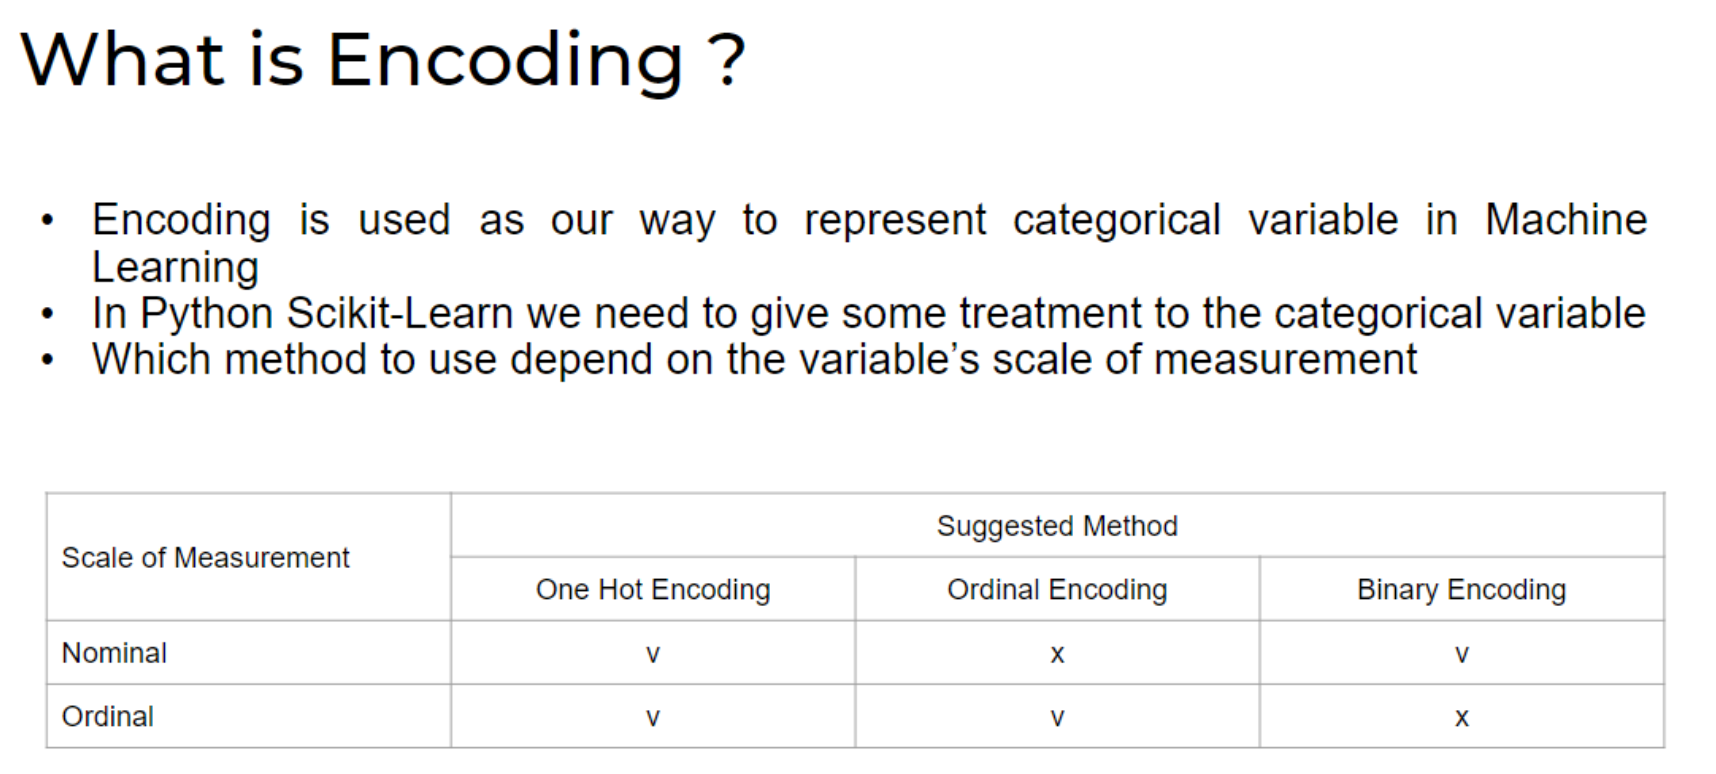

> ## __Pandas: Get Dummy__

In [2]:
#1. Load dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#Mengeck jumlah data per kategori value setiap variable

for i in 'sex smoker day time'.split():
    print(tips[i].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


__NOTES:__
<br> these are the variables that we will transform into dummy variables.
- Sex two categories
- smoker two categories
- day four categories 
- time two categories. 
<br> For each categories we will make one dummy variable.

In [4]:
#membuat dummy dari kolom yg telah ditentukan dan dijadikan dataframe

tips_dummy = pd.get_dummies(tips, columns='sex smoker day time'.split())
tips_dummy.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


__Result:__
<br>You can clearly see that each variables now has dummy variables as many as the number of category.
(-) Jumlah kolom menjadi banyak sekali

> ## __ScikitLearn: One Hot Encoding__

One Hot Encoding also can be implemented using sklearn library. <br>we use OneHotEncoder and ColumnTransformer classes. <br>OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

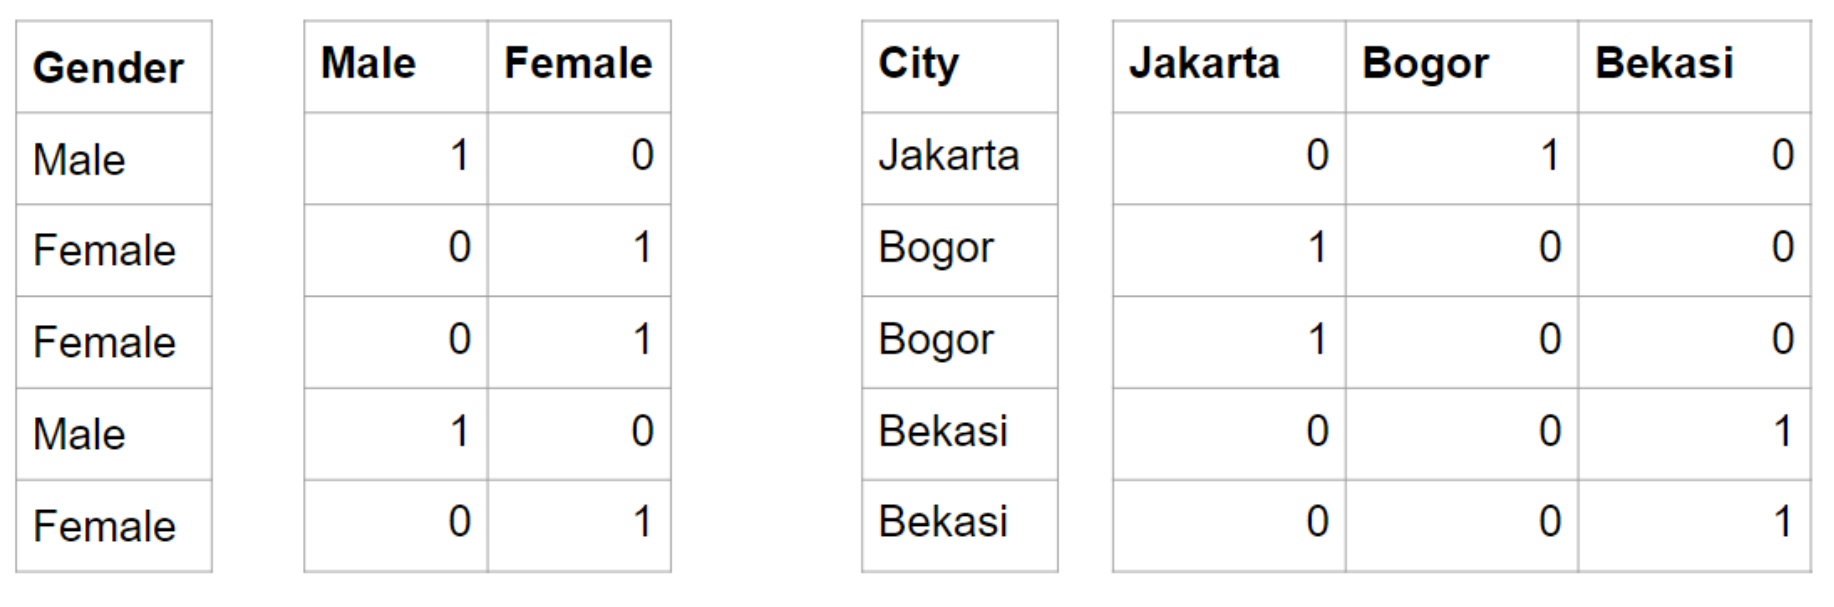

In [5]:
#1. Import Library

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
#Melihat parameter yg ada di onehot

OneHotEncoder().get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': True}

In [7]:
#2. Membuat ColumnTransformer(melakukan perubahan pada column) dan encoding

                                #nama proses, functionnya, datanya kolom apa aja
transformer = ColumnTransformer([
                                ('encoder', OneHotEncoder(), 'sex smoker day time'.split())
])
# Jumlah kategori : 2 + 2 + 4 + 2 = 10
#jika ingin melakukan encoding lain untuk kolom lain, ditulis dialam tuple sesuai format diatas

tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded.head()
#minusnya nama columnya berubah jadi angka

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


__Notes:__
Using this method you don't automatically rename the variables. <br> You must get the name of the feature separately. <br>But, in the later course you will find out that preprocessing method from skelarn can make your whole process of the modeling easier for: cross validation and hyperparameter tuning.

In [8]:
#mengecek nama kolom aslinya

transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [9]:
#mengubah nama kolom dataframe menjadi nama hasil encoding

tips_encoded.columns = transformer.get_feature_names()
tips_encoded = pd.concat([tips['total_bill tip size'.split()], tips_encoded], axis=1)
tips_encoded.head()

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


> ## __Manual: Ordinal Encoding (.map)__

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.

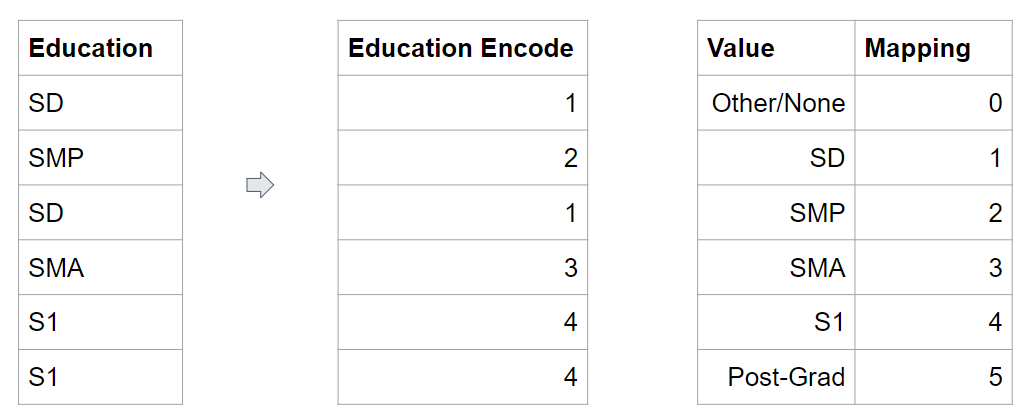

In [10]:
#1. Mempersiapkan data

tips_ordinal_encoded = tips.copy()

In [11]:
#2. Mengecek value counts

tips_ordinal_encoded.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [12]:
#3. Melakukan encoding secara manual dengan .map

tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4})
tips_ordinal_encoded.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4


In [13]:
#4. Mengeck value counts yg sudah berubah

tips_ordinal_encoded.day.value_counts()

3    87
4    76
1    62
2    19
Name: day, dtype: int64

> ## __Category_encoder : OrdinalEncoder (ce)__

In [14]:
#1. Import library

import category_encoders as ce

In [15]:
#2. Membuat ordinal mapping dan encoding

#a. membuat ordinal mapping terlebih dahulu
ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}}
]

#b. membuat objek dan encoding
ordinal_encoder = ce.OrdinalEncoder(cols = 'day', mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford.head()

,day
0,4
1,4
2,4
3,4
4,4


In [16]:
#3. menggabungkan tabel dengan concat

tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded.head()

,total_bill,tip,sex,smoker,day,time,size,day
0,16.99,1.01,Female,No,Sun,Dinner,2,4
1,10.34,1.66,Male,No,Sun,Dinner,3,4
2,21.01,3.50,Male,No,Sun,Dinner,3,4
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,4


In [17]:
# CONTOH: encoding dua kolom sekaligus

ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}},
    {'col': 'time',
     'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day time'.split(), mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day time'.split()])
dford.head()

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2


In [18]:
#menggabungkan contoh diatas dengan concat

tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size,day,time
0,16.99,1.01,Female,No,Sun,Dinner,2,4,2
1,10.34,1.66,Male,No,Sun,Dinner,3,4,2
2,21.01,3.50,Male,No,Sun,Dinner,3,4,2
3,23.68,3.31,Male,No,Sun,Dinner,2,4,2
4,24.59,3.61,Female,No,Sun,Dinner,4,4,2
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3,2
242,17.82,1.75,Male,No,Sat,Dinner,2,3,2


> ## __Binary Encoding__

<br> Binary encoding using category_encoder library. 
<br> We will implement binary ecoding using the category_encoders library to day variable.

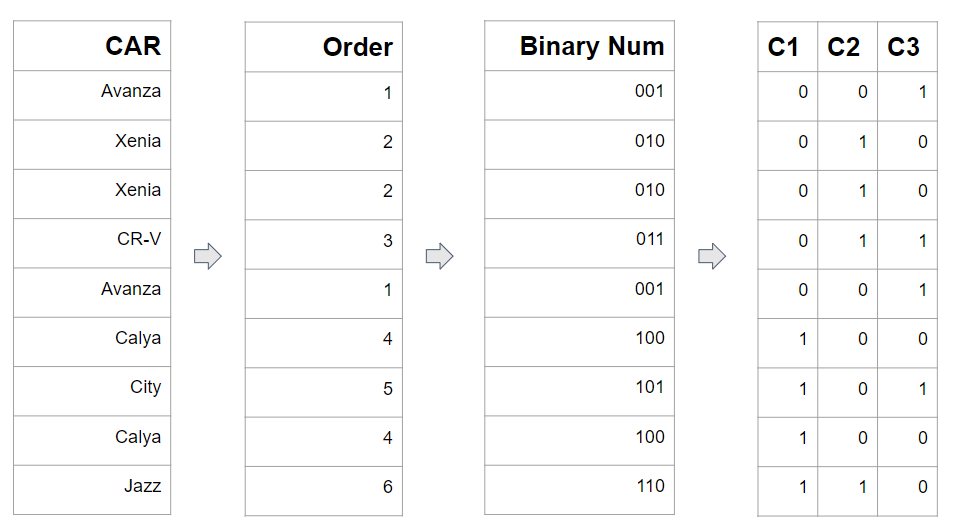

In [19]:
#1.Melakukan encoding

binary_encoder = ce.BinaryEncoder(cols = ['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin.head()

#hasil encoding muncul 3 kolom untuk binary karena jumlah kategori kolom aslinya ada 4 (thurs, fri, sat, sun)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [20]:
#2. Menggabungkan df asli dan hasil encoding

tips_binary_encoded = pd.concat([tips, dfbin], axis=1)
tips_binary_encoded.head()

,total_bill,tip,sex,smoker,day,time,size,day_0,day_1,day_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1


In [21]:
#mengeck unique

tips_binary_encoded['day'].unique()

#terdapat 4 kategori

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [22]:
#Jika ada data baru dan mau diencode 

day = pd.Series('Fri Sat Sun Thur'.split(), name='day') #data baru 

day_binary = binary_encoder.transform(day) #encoder yg telah dibuat
day_binary

,day_0,day_1,day_2
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,1


In [23]:
#inverse transform untuk mengembalikan kembali ke data sebelum di encode

binary_encoder.inverse_transform(day_binary)

,day
0,Fri
1,Sat
2,Sun
3,Thur
